In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
djia_df = pd.read_excel('../DJIA_Jan2016_Dec2016.xlsx', parse_dates=[0]).set_index('Date')
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [45]:
diff_close = djia_df['Close'].diff(1)

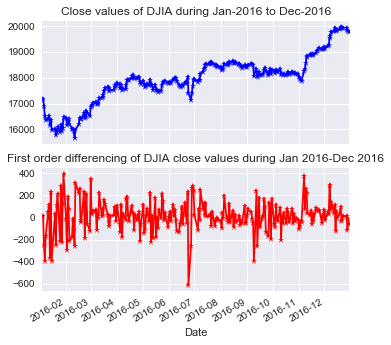

In [13]:
f, axarr = plt.subplots(2, sharex = True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Close values of DJIA during Jan-2016 to Dec-2016')
djia_df['Close'].plot(linestyle='-', marker = '*', color='b', ax =axarr[0])
axarr[1].set_title('First order differencing of DJIA close values during Jan 2016-Dec 2016')
diff_close.plot(linestyle='-', marker='*', color='r', ax = axarr[1])

### ACF & Ljung-Box Test

In [50]:
from statsmodels.tsa.stattools import acf
djia_acf = acf(djia_df['Close'])
diff_close_acf = acf(diff_close, missing='conservative')

In [52]:
diff_close_acf

array([ 1.        , -0.08462456,  0.03069957,  0.00782584, -0.02025116,
       -0.02813406,  0.00413628,  0.03802531,  0.01183296, -0.04194215,
        0.05445325,  0.07150566, -0.03384988, -0.04007926, -0.04065982,
       -0.04299821, -0.01383393,  0.0634011 ,  0.10811434, -0.09307981,
        0.09455763,  0.02563291, -0.00404245, -0.01739467,  0.0200331 ,
       -0.01593878, -0.04128779, -0.03214588, -0.0114947 , -0.00408797,
        0.0052328 ,  0.06041279, -0.06624865, -0.04476055, -0.04533534,
        0.03490582, -0.04506668,  0.0337877 , -0.0671307 ,  0.0081003 ,
       -0.00326316])

/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


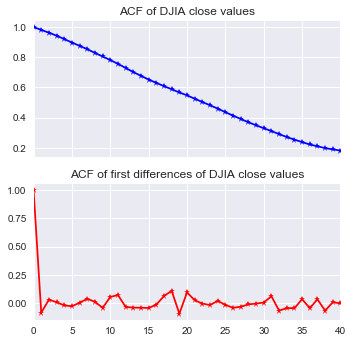

In [53]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('ACF of DJIA close values')
sns.tsplot(djia_acf, linestyle='-', marker='*', color='b', ax = axarr[0])
axarr[1].set_title('ACF of first differences of DJIA close values')
sns.tsplot(diff_close_acf,linestyle='-', marker='*', color='r', ax= axarr[1])

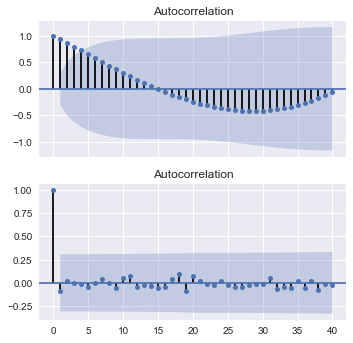

In [54]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('ACF of DJIA close values')
axarr[1].set_title('ACF of first differences of DJIA close values')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(x = djia_acf, ax = axarr[0])
plot_acf(x = diff_close_acf, ax=axarr[1])
plt.show()

In [65]:
lag = range(0, 30)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

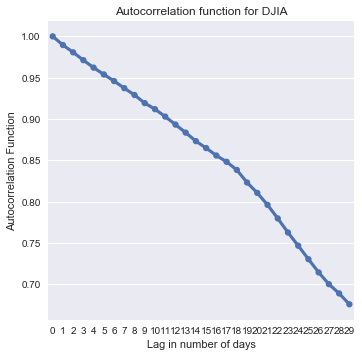

In [67]:
plt.figure(figsize = (5.5, 5.5))
g = sns.pointplot(x=list(lag), y=djia_acf, markers = '.')
g.set_title('Autocorrelation function for DJIA')
g.set_xlabel('Lag in number of days')
g.set_ylabel('Autocorrelation Function')
#_ =plt.xticks(rotation=90) ### This one also works!
_ = g.set_xticklabels(lag)

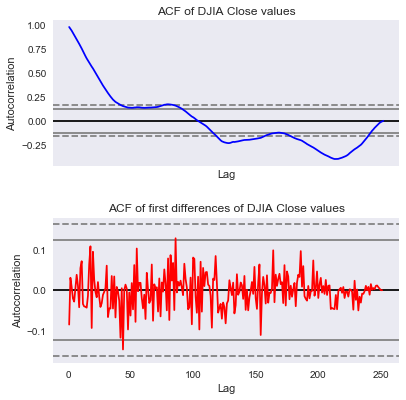

In [68]:
from pandas.plotting import autocorrelation_plot
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(diff_close.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)